In [1]:
# import the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
# load and read the data
lead_data = pd.read_csv("/Users/priachaurasia/Downloads/Machine Learning/Lead Scoring Case Study/Lead Scoring Assignment/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [3]:
# check the data type of all the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# check the no of rows and column
lead_data.shape

(9240, 37)

In [5]:
# check the numeric columns
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Data Preparation

There are few columns which has value as select which are basically null value. 

- First we make a list of all categorical columns and check the columns having value as select.
- Replace the select with null values

In [19]:
categorical_column = lead_data.select_dtypes(include=['object']).columns.tolist()


In [20]:
for i in categorical_column:
    if lead_data[i].str.contains('Select').any() == True:
        print(i)    

Specialization
How did you hear about X Education
Lead Profile
City


Above are the 4 columns which has the select values. Now we will replace select values with null.

In [21]:
lead_data = lead_data.replace(to_replace ="Select", value =np.nan)

#### check the missing value percentage in each columns -

There are few columns which are sales team generated. We will also drop the sales team generated columns with high missing values. Such columns are -

- lead profile
- Lead quality
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

We will also drop columns which has high (more than 50%) missing values.

In [22]:
#Check missing values percentage in all the columns of application data
all_columns = (lead_data.isnull().sum()/len(lead_data)*100).reset_index()
all_columns.rename(columns = {'index':'Missing Columns', 0:'Missing Values'}, inplace=True)
all_columns.sort_values(by='Missing Values',ascending=False, inplace = True)

In [23]:
all_columns

,Missing Columns,Missing Values
13,How did you hear about X Education,78.463203
28,Lead Profile,74.188312
25,Lead Quality,51.590909
33,Asymmetrique Profile Score,45.649351
32,Asymmetrique Activity Score,45.649351
30,Asymmetrique Activity Index,45.649351
31,Asymmetrique Profile Index,45.649351
29,City,39.707792
12,Specialization,36.580087
24,Tags,36.287879


In [24]:
#Store the above data into dataframe for missing values >45% 
missing_column = list(all_columns[all_columns['Missing Values'] > 45]['Missing Columns'])

In [25]:
len(missing_column)

7

In [26]:
# Drop all 3 columns from lead data having more than 45% missing values
lead_data.drop(missing_column, axis=1, inplace = True)

In [27]:
#check the shape of lead data after droping all the columns having more than 50% missing values.
lead_data.shape

(9240, 30)

##### check the categorical columns again and impute

In [28]:
lead_data.select_dtypes(include=['object']).columns.tolist()

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Total 26 categorical columns are remained in the data. We will take each column one by one and either drop the column which has skewed values or impute with appropriate value

##### 'Prospect ID'

Prospect Id does not have any significance so we can drop the prospect id

In [29]:
lead_data=lead_data.drop('Prospect ID', axis=1)

##### 'Lead Origin'

In [30]:
# check Null Values in Lead Origin
lead_data['Lead Origin'].isnull().sum()

0

In [31]:
# chcek values in lead_origin column
lead_data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Quick Add Form has only 1 value, we can either drop or add into lead add form. We will replace Quick Add Form with Lead Add Form

In [32]:
lead_data['Lead Origin'] = lead_data['Lead Origin'].replace(to_replace ="Quick Add Form", value ='Lead Add Form')

In [33]:
# chcek values in lead_origin column again
lead_data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               719
Lead Import                  55
Name: Lead Origin, dtype: int64

##### 'Lead Source'

In [34]:
# check null values in 'Lead Source' column
lead_data['Lead Source'].isnull().sum()

36

In [35]:
# check the values in Lead Source column
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
blog                    1
Pay per Click Ads       1
testone                 1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

There are so many `Lead Source` labels which has very less values so we can club them together.

In [36]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(to_replace =['Reference','Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Press_Release','Live Chat','Social Media','NC_EDM','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone'], value ='Others')

In [37]:
# check the values in lead source column again
lead_data['Lead Source'].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Others            0.096045
Name: Lead Source, dtype: float64

In lead_source we can impute missing values with Others

In [38]:
# replace the null values with Others
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('Others')

In [40]:
# check the null values again
lead_data['Lead Source'].isnull().sum()

0

##### 'Do Not Email'

In [41]:
# check the values in 'Do Not Email' column
lead_data['Do Not Email'].value_counts(normalize = True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

There are only 2 values in 'Do Not Email' column but No has approx 92% values which is skewed and we can't take any decision with these values, so we will drop `Do Not Email` column

In [42]:
lead_data=lead_data.drop('Do Not Email', axis=1)

##### 'Do Not Call'

In [43]:
#check the value in 'Do Not Call' column
lead_data['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

There are only 2 values in 'Do Not Call' column but NO has approx 92% values which is skewed and we can't take any decision with these values, so we will drop `Do Not Call` column

In [44]:
lead_data=lead_data.drop('Do Not Call', axis=1)

##### 'Last Activity'

In [45]:
# Check the values in 'Last Activity' column
lead_data['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Marked Spam               0.000219
Email Received                  0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

There are so many `Last Activity` labels which has very less values so we can club them together.

In [46]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(to_replace =['Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'], value ='Others')

In [47]:
# check the values in 'Last Activity' column again
lead_data['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Email Bounced               326
Others                      321
Email Link Clicked          267
Name: Last Activity, dtype: int64

In [48]:
# Check the missing value
lead_data['Last Activity'].isnull().sum()

103

In [49]:
# Replace missing value with others
lead_data['Last Activity'] = lead_data['Last Activity'].fillna('Others')

In [50]:
# check the null value again
lead_data['Last Activity'].isnull().sum()

0

Now, there is no null value in 'Last Activity' column

##### 'Country'

In [51]:
# check the values in 'Country' column
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
Italy                      2
Philippines                2
Uganda                     2
Netherlands                2
Ghana                      2
Asia/Pacific Region        2
China                      2
Kenya                      1
Russia                     1
Switzerland                1
Denmark                    1
Indonesia                  1
Sri Lanka                  1
Malaysia      

There are so many countries which has very less value. Also countries has null values, we can fill the null values and other countries as `Outside India`

In [52]:
lead_data['Country'] = lead_data['Country'].apply(lambda x: 'Outside India' if x!= 'India' else 'India')

In [53]:
#Check the missing value
lead_data['Country'].isnull().sum()

0

There is no missing value in country column now

##### 'Specialization'

In [54]:
# check the values in 'Specialization' column
lead_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [55]:
# Check the missing value
lead_data['Specialization'].isnull().sum()

3380

Missing values are quite high, we can replace the missing with new label `Unknown`.

In [56]:
lead_data['Specialization'] = lead_data['Specialization'].fillna('Unknown')

In [57]:
# Check the missing value again
lead_data['Specialization'].isnull().sum()

0

##### 'What is your current occupation'

In [58]:
# check the values in 'What is your current occupation' column
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [59]:
# Check the missing value
lead_data['What is your current occupation'].isnull().sum()

2690

In [60]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('Unknown')

In [61]:
# Check the missing value again
lead_data['What is your current occupation'] .isnull().sum()

0

Housewife & Businessman labels have very less values so we can merge them with others.

In [62]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(to_replace =['Housewife','Businessman'], value ='Other')

In [63]:
# check the values in 'What is your current occupation' column
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

##### 'What matters most to you in choosing a course'

In [65]:
# check the values in 'What matters most to you in choosing a course' column
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

`What matters most to you in choosing a course` has almost only one value so we can drop this column. 

In [66]:
lead_data = lead_data.drop('What matters most to you in choosing a course',axis=1)

##### 'Search'

In [67]:
# check the values in 'Search' column
lead_data['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

There are only 2 values in 'Search' column but No has approx 99.9% values which is skewed and we can't take any decision with these values, so we will drop `Search` column

In [68]:
lead_data = lead_data.drop('Search',axis=1)

##### 'Magazine'

In [69]:
# check the values in 'Magazine' column
lead_data['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

`Magazine` column has only 1 value so we can drop this column.

In [70]:
lead_data= lead_data.drop('Magazine', axis = 1)

##### 'Newspaper Article'

In [71]:
# check the values in 'Newspaper Article' column
lead_data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

`Newspaper Article` has only 2 values but almost all values are No only so We can drop 'Newspaper Article' column

In [72]:
lead_data= lead_data.drop('Newspaper Article', axis = 1)

##### 'X Education Forums'

In [73]:
# check the values in 'X Education Forums' column
lead_data['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

`X Education Forums` has only 2 values but almost all values are No only so We can drop `X Education Forums` column

In [74]:
lead_data= lead_data.drop('X Education Forums', axis = 1)

##### 'Newspaper'

In [75]:
# check the values in 'Newspaper' column
lead_data['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

`Newspaper` has only 2 values but almost all values are No only so We can drop `Newspaper` column

In [76]:
lead_data= lead_data.drop('Newspaper', axis = 1)

##### 'Digital Advertisement'

In [77]:
# check the values in 'Digital Advertisement' column
lead_data['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

`Digital Advertisement` has only 2 values but almost all values are No only so We can drop `Digital Advertisement` column

In [78]:
lead_data= lead_data.drop('Digital Advertisement', axis = 1)

##### 'Through Recommendations'

In [79]:
# check the values in 'Through Recommendations' column
lead_data['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

`Through Recommendations` has only 2 values but almost all values are No only so We can drop `Through Recommendations` column

In [80]:
lead_data= lead_data.drop('Through Recommendations', axis = 1)

##### 'Receive More Updates About Our Courses'

In [81]:
# check the values in 'Receive More Updates About Our Courses' column
lead_data['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

`Receive More Updates About Our Courses` column has only 1 value so we can drop this column.

In [82]:
lead_data = lead_data.drop('Receive More Updates About Our Courses',axis=1)

##### 'Tags'

In [83]:
# check the values in 'Tags' column
lead_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

There are so many labels which has very less values so we can club them together.

In [84]:
lead_data['Tags'] = lead_data['Tags'].replace(to_replace =['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)'], value ='Others')


In [85]:
# check the values in 'Tags' column again
lead_data['Tags'].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [86]:
# check the null values
lead_data['Tags'].isnull().sum()

3353

approx 30% values are missing so we can replace missing values with Others

In [87]:
lead_data['Tags']=lead_data['Tags'].fillna('Others')

In [88]:
#check the missing value again
lead_data['Tags'].isnull().sum()

0

##### 'Update me on Supply Chain Content'

In [89]:
# check the values in 'Update me on Supply Chain Content' column
lead_data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

`Update me on Supply Chain Content` column has only 1 value so we can drop this column.

In [90]:
lead_data = lead_data.drop('Update me on Supply Chain Content',axis=1)

##### 'Get updates on DM Content' column

In [91]:
# check the values in 'Get updates on DM Content' column
lead_data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

`Get updates on DM Content` column has only 1 value so we can drop this column.

In [92]:
lead_data = lead_data.drop('Get updates on DM Content',axis=1)

##### 'City'

In [93]:
# Check the values in 'City' column
lead_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

`Other Metro Cities` and `Tier2 Cities` can be clubed with `Other Cities`

In [94]:
lead_data['City'] = lead_data['City'].replace(to_replace =['Other Metro Cities','Tier II Cities'], value ='Other Cities')

In [95]:
# Check the values in 'City' column again
lead_data['City'].value_counts()

Mumbai                         3222
Other Cities                   1140
Thane & Outskirts               752
Other Cities of Maharashtra     457
Name: City, dtype: int64

In [96]:
# check the null values
lead_data['City'].isnull().sum()

3669

Approx 36% values are null so we can replace the null value with a Unknown label.

In [97]:
lead_data['City'] = lead_data['City'].fillna('Unknown')

In [98]:
# Check the values in 'City' column again
lead_data['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Other Cities                   1140
Thane & Outskirts               752
Other Cities of Maharashtra     457
Name: City, dtype: int64

##### 'I agree to pay the amount through cheque'

In [99]:
# Check the values in 'I agree to pay the amount through cheque' column
lead_data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

`I agree to pay the amount through cheque` column has only 1 value so we can drop this column.

In [100]:
lead_data = lead_data.drop('I agree to pay the amount through cheque',axis=1)

##### 'A free copy of Mastering The Interview'

In [103]:
# Check the values in 'A free copy of Mastering The Interview' column
lead_data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

A free copy of Mastering The Interview has only 2 values so We can treat 'A free copy of Mastering The Interview' column as numeric column.

In [104]:
# check the missing values
lead_data['A free copy of Mastering The Interview'].isnull().sum()

0

'A free copy of Mastering The Interview'' doesn't have any missing value

##### 'Last Notable Activity'

In [105]:
# check the values in 'Last Notable Activity' column
lead_data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

There are so many `Last Notable Activity` labels which has very less values so we can club them together.

In [106]:
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(to_replace =['Had a Phone Conversation','Email Marked Spam','View in browser link Clicked','Resubscribed to emails','Email Received','Approached upfront','Form Submitted on Website'], value ='Others')



In [107]:
# check the values in 'Last Notable Activity' column 
lead_data['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: Last Notable Activity, dtype: int64

In [108]:
# check the null values
lead_data['Last Notable Activity'].isnull().sum()

0

There is no null value present in `Last Notable Activity` column.

#### Check the numeric column and handle the missing values.

In [109]:
lead_data.select_dtypes(include=['int64','float64']).columns.tolist()

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

##### Lead Number

`Lead Number` is going to help for analysis so we preserve the lead number

##### 'Converted'

In [110]:
# check the values in 'Converted' column
lead_data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

Converted column is also our Target variable column, we will keep this as it is.

In [111]:
# check the null values in 'Converted' column
lead_data['Converted'].isnull().sum()

0

There is no null values in converted column.

##### 'TotalVisits'

In [113]:
# check the null value in TotalVisit column
lead_data['TotalVisits'].isnull().sum()

137

Continuous variables Total Visit may have outliers so we will replace the missing values with Median.

In [114]:
lead_data['TotalVisits'] = lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median())

In [115]:
#check the null value again
lead_data['TotalVisits'].isnull().sum()

0

##### 'Total Time Spent on Website'

In [116]:
# check the null value in Total Time Spent on Website column
lead_data['Total Time Spent on Website'].isnull().sum()

0

`Total Time Spent on Website` doesn't have any missing values.

##### 'Page Views Per Visit'

In [117]:
# check the null value in Page Views Per Visit column
lead_data['Page Views Per Visit'].isnull().sum()

137

Continuous variables `Page Views Per Visit` may have outliers so we will replace the missing values with Median.

In [118]:
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median())

In [119]:
#check the null value again
lead_data['Page Views Per Visit'].isnull().sum()

0

Before checking outliers first inspect the data again

In [120]:
lead_data.shape

(9240, 15)

##### check the null value again in data

In [121]:
lead_data.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

There is no missing value in the data. Now we can move to outlier analysis

#### Outlier Analysis

- Here in our analysis to find out the outliers, we have considered continuous columns and analyzed the statistics of them.

In [122]:
lead_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.00,55.0


#### Analysis:

If we observe the above columns, there are many columns with outlier values which are having a huge difference compared to the regular intervals of other values. We will list all columns below -

- TotalVisits
- Total Time Spent on Website
- Page Views Per Visit

- We also design the box plot or scatter plot to identify the outliers in above 3 columns

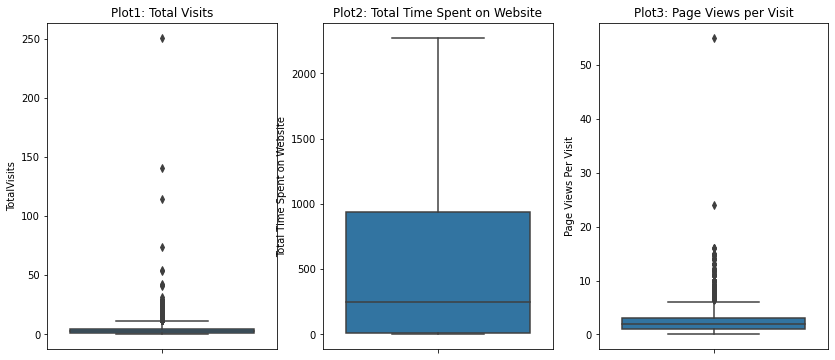

In [123]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.boxplot(y='TotalVisits', data=lead_data)
plt.title('Plot1: Total Visits')
plt.subplot(1,3,2)
sns.boxplot(y='Total Time Spent on Website', data=lead_data)
plt.title('Plot2: Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(y='Page Views Per Visit', data=lead_data)
plt.title('Plot3: Page Views per Visit')
plt.show()

Above plots indicate `Total Visits` and `Page Views Per Visit` have outliers, Removing outlier values based on the Interquartile distance.

In [124]:
Q1 = lead_data['TotalVisits'].quantile(0.25)
Q3 = lead_data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
lead_data=lead_data.loc[(lead_data['TotalVisits'] >= Q1 - 1.5*IQR) & (lead_data['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = lead_data['Page Views Per Visit'].quantile(0.25)
Q3 = lead_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead_data=lead_data.loc[(lead_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

lead_data.shape

(8611, 15)

##### plot the boxplot again to check the outliers now

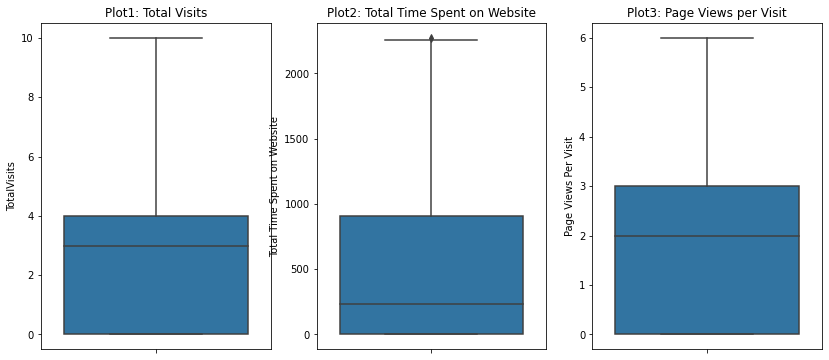

In [125]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.boxplot(y='TotalVisits', data=lead_data)
plt.title('Plot1: Total Visits')
plt.subplot(1,3,2)
sns.boxplot(y='Total Time Spent on Website', data=lead_data)
plt.title('Plot2: Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(y='Page Views Per Visit', data=lead_data)
plt.title('Plot3: Page Views per Visit')
plt.show()

We can clearly see now, outliers have been handled

Data is clean now but before moving to prepare data for Model building, we will do some Exploratory data analysis to know the type of data present in dataset.

### Univariate Analysis - Categorical

In [126]:
lead_data.select_dtypes(include=['object']).columns.tolist()

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

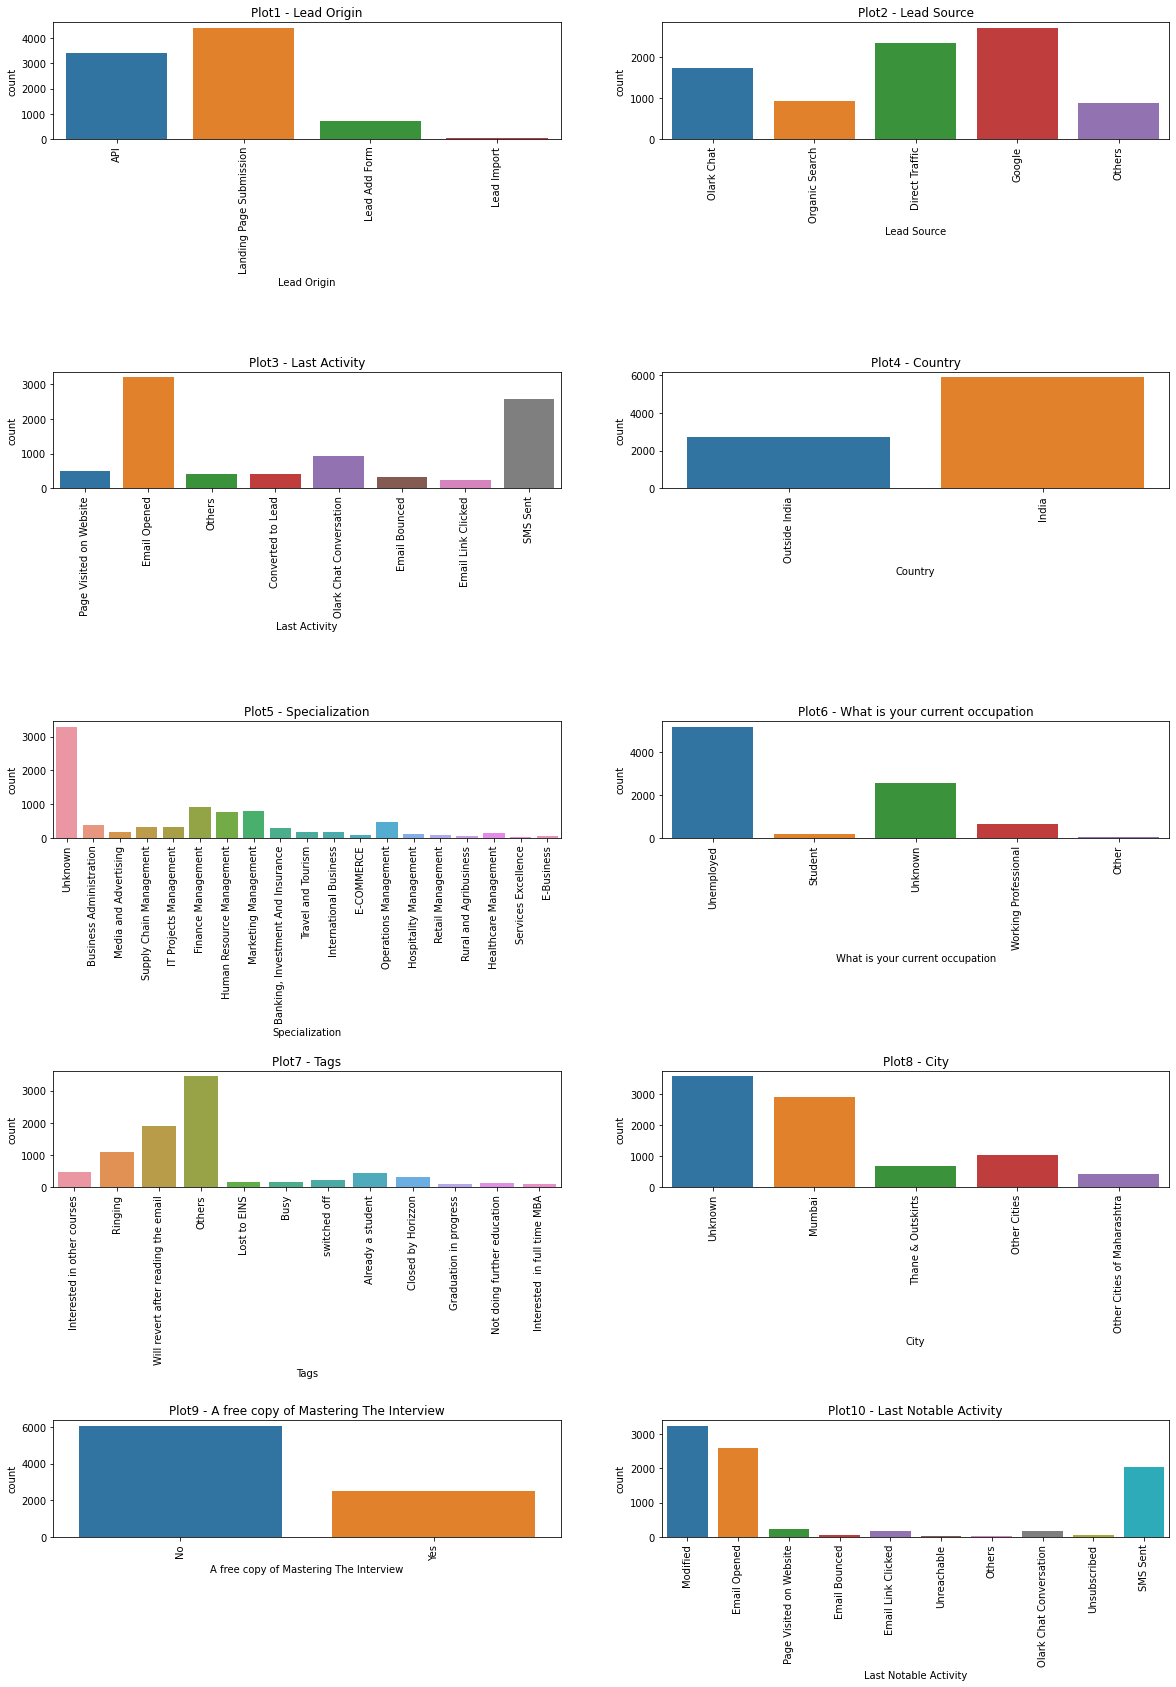

In [127]:
cat_cols = ['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']
rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (20,60))
for col in cat_cols:
    plt.subplot(rowCnt, colCnt, subCnt)
    sns.countplot(lead_data[col])
    plt.title("Plot"+  str(subCnt)+ ' - ' + col )
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 2.0)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. Lead origin
- Major leads are generated through landing page submission or through API integration

###### 2. Lead Source
- Google is the most preffered lead generation source. Direct traffic and olark chat are also contributed significantly in lead generation.

###### 3. Last Activity
- Email open and SMS sent are main `last activity` while email link clicked is least.

###### 4. Country
- 70% leads are from India rest are from different countries other than India.

###### 5. Specialization
- Finance management is the most preferred specialization while services excelence is the least

###### 6. What is your current occupation
- Most of the leads has occupation as unemployed. Few are the student too.

###### 7. Tags
- Revert after reading the email are most preferred tag while graduation in progress is least preferred.

###### 8. City
- Most of the leads are from Mumbai and near by cities only. 

###### 9. A free copy of Mastering The Interview
- 70% leads are not opted A free copy of Mastering The Interview

###### 10. Last Notable Activity
- Modified, email opened and sms sent are most last notable activity.

### Univariate Analysis - Continuous

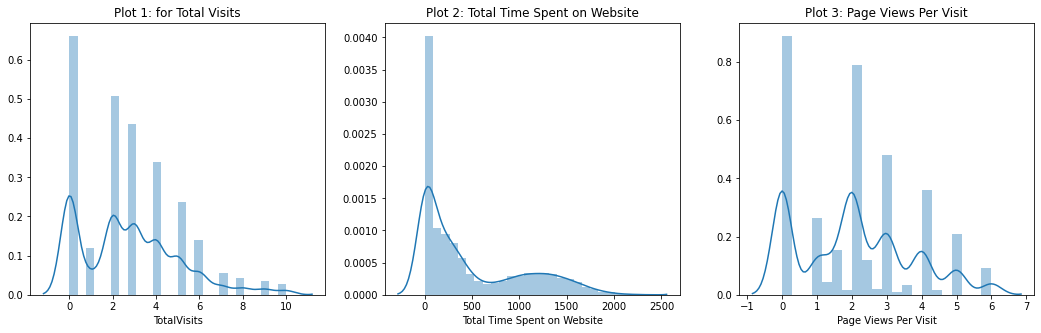

In [128]:
plt.figure(figsize = (18,5))

plt.subplot(1, 3, 1)
plt.title('Plot 1: for Total Visits' )
sns.distplot(lead_data['TotalVisits'])

plt.subplot(1, 3, 2)
plt.title('Plot 2: Total Time Spent on Website' )
sns.distplot(lead_data['Total Time Spent on Website'])

plt.subplot(1, 3, 3)
plt.title('Plot 3: Page Views Per Visit' )
sns.distplot(lead_data['Page Views Per Visit'])

plt.show()


###### Insights of each plots draw above:

###### Plot 1 : Total Visits
- Many leads has visited 2 and 3 times on website. Few have not visited website too. 

###### Plot 2 : Total Time Spent on Website
- Most of the leads has average time less than 500 milisecond while few leads has avg time between 1000 to 1500 miliseconds too.

###### Plot 3 : Page views per visit
- Many leads has visited 2 page before getting captured while few have not visited any page.


### Bivariate Analysis: Categorical - Continuous

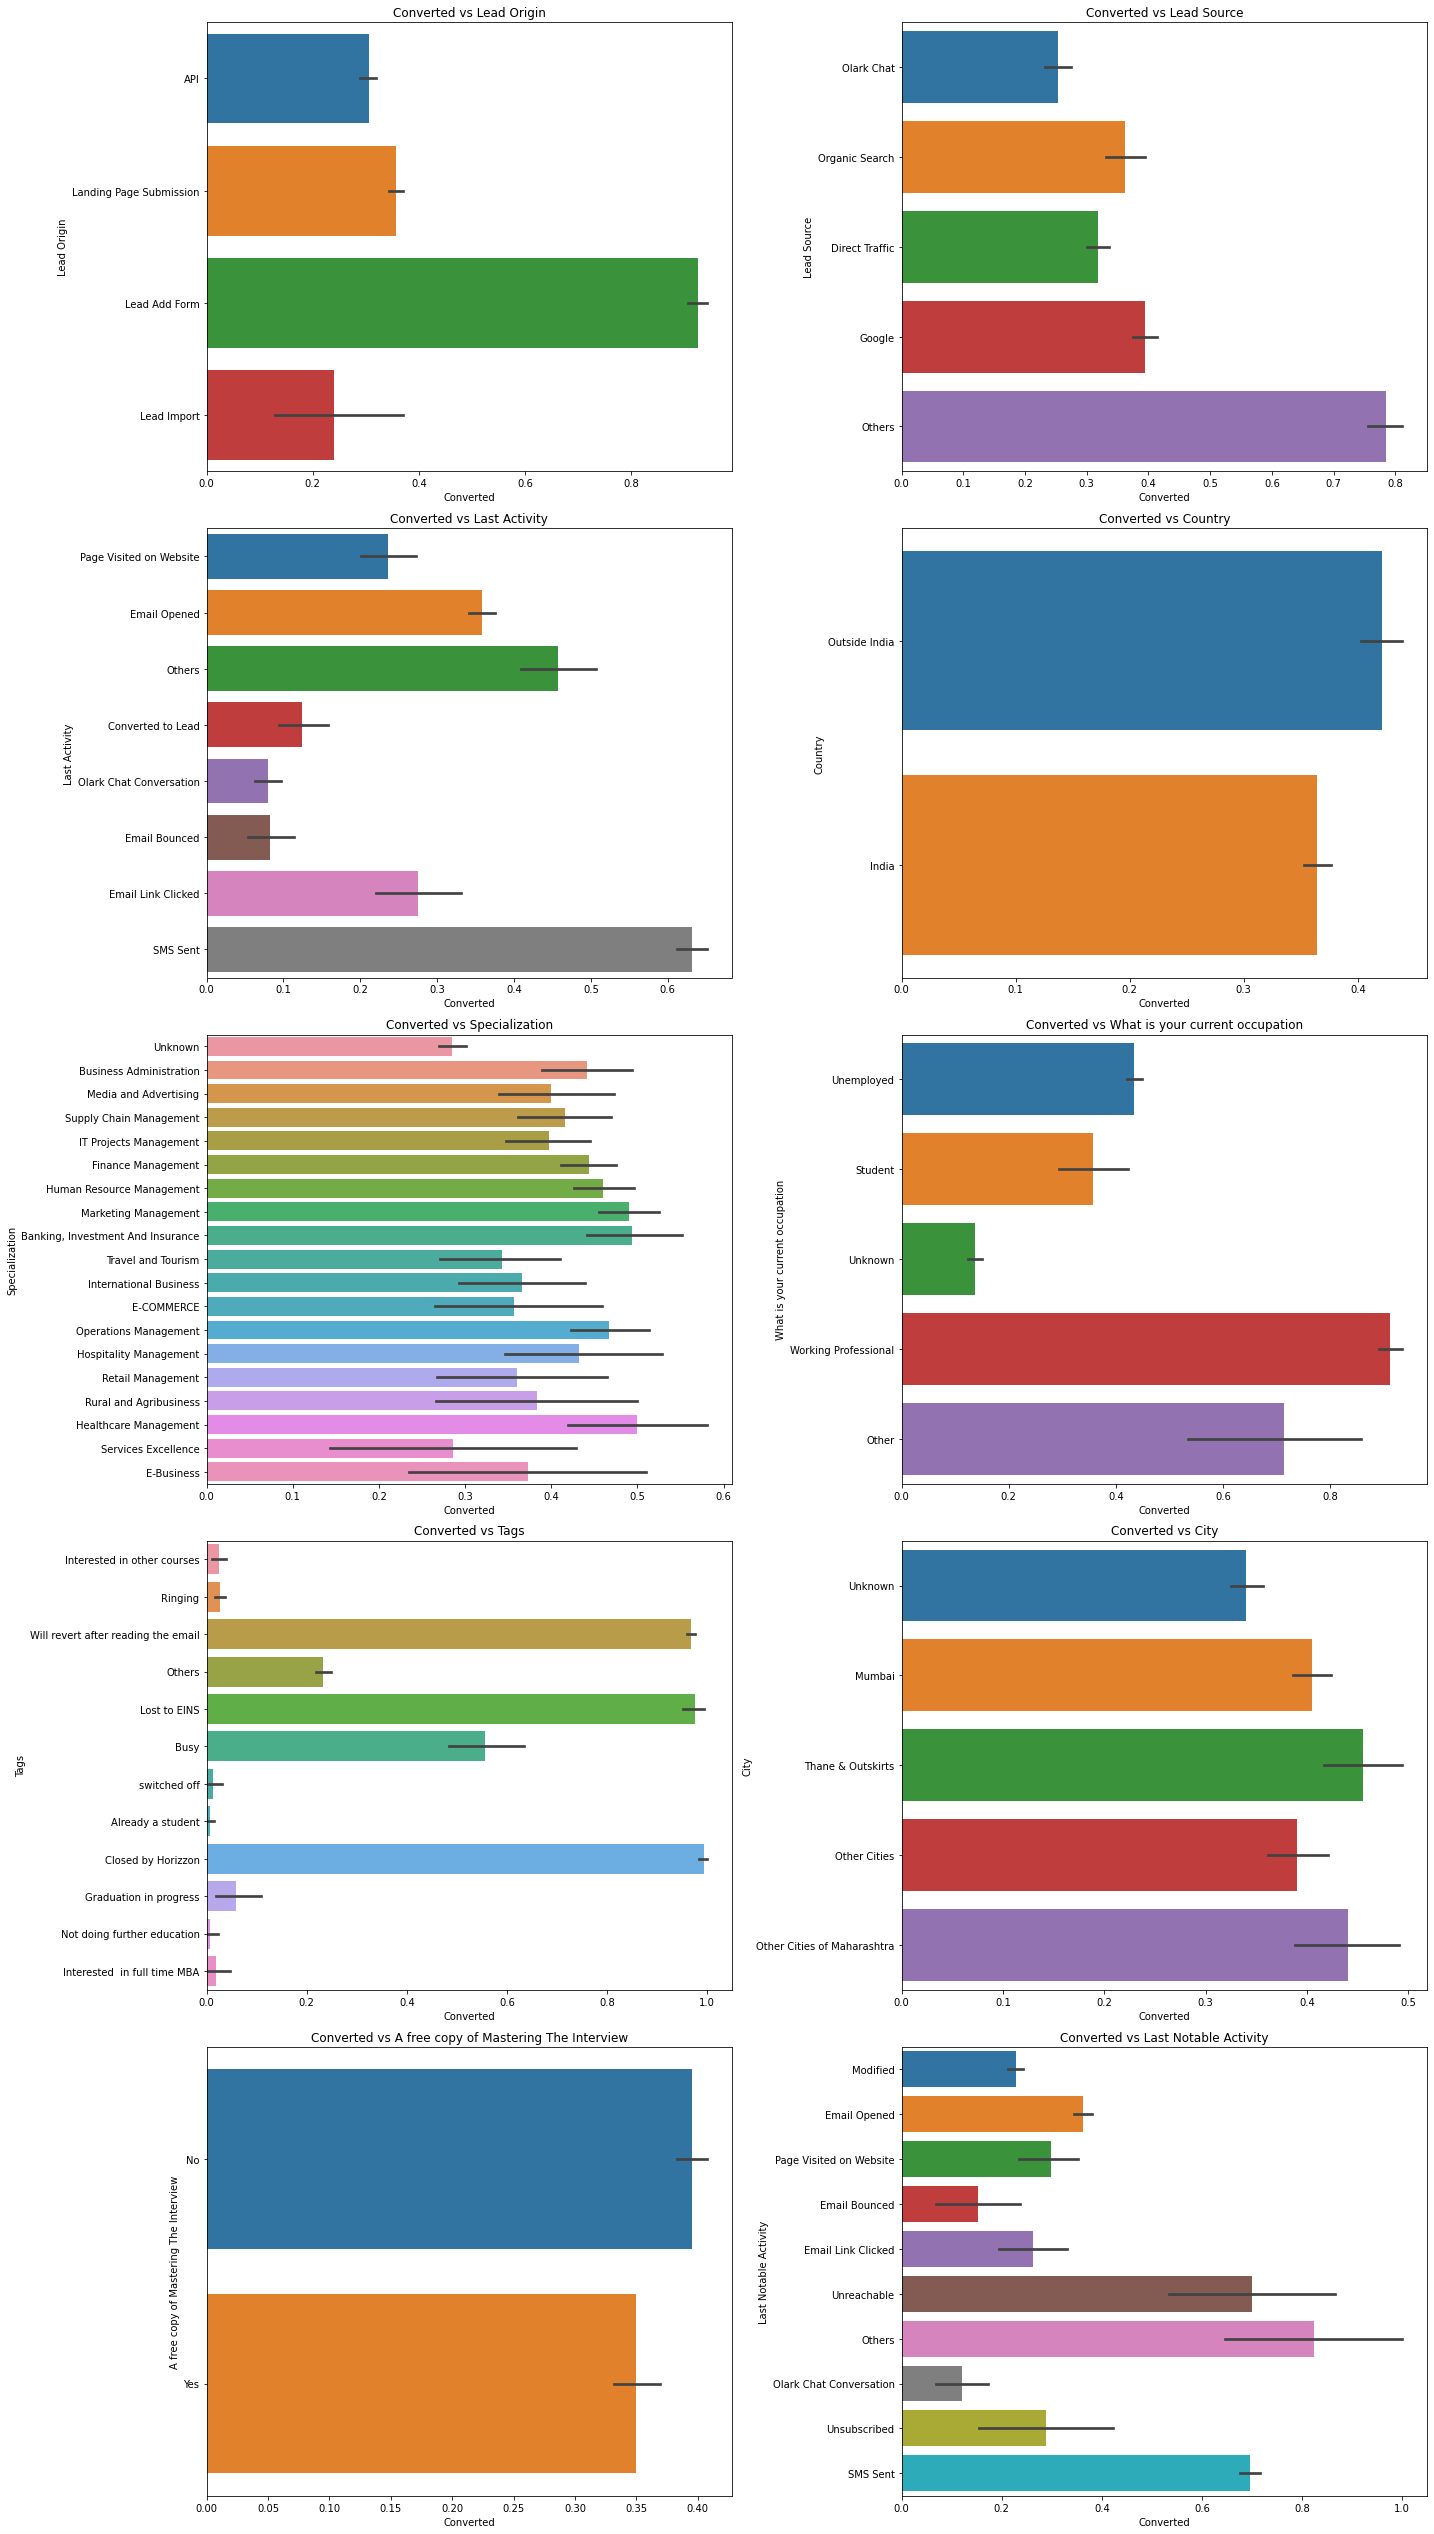

In [129]:
cols = ['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

rowCnt = len(cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (20,70))
for col in (cols):
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Converted vs '+ col)
    sns.barplot(lead_data['Converted'], lead_data[col])
   # plt.subplots_adjust(vspace = 2.5)
    plt.tight_layout(pad=1.0)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. Lead origin
- leads generated through `lead ad form` are converted most while leads generated through `lead import` are converted least. 

###### 2. Lead Source
- Leads generated through `Google` and `Organic` source are converted most.

###### 3. Last Activity
- Leads as `last activity` SMS sent are converted most

###### 4. Country
- There are significant conversion in leads from `outside India`.

###### 5. Specialization
- `Marketing management`, `banking investment and insurance` and `health care managemen` leads are better converted.

###### 6. What is your current occupation
- `Working prefessional` leads are most converted.

###### 7. Tags
- `Will revert after reading the email` and `lost to EINS` are the most preferred tags for lead conversion

###### 8. City
- Leads from `Thane and outskirts` are most converted

###### 9. A free copy of Mastering The Interview
- Leads opted `A free copy of Mastering The Interview` converted significantly

###### 10. Last Notable Activity
- Leads with `Last notable activity` as SMS sent are converted most.

### Bivariate Analysis: Continuous - Continuous

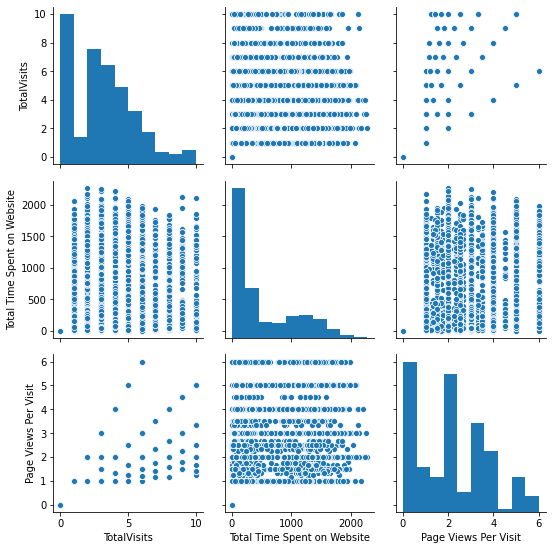

In [130]:
# visulize the numeric variable
sns.pairplot(lead_data[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])
plt.show()

###### Insights of each plots draw above:

###### 1. Total Visits vs Total Time Spent on Website

- There is no corelation between total visits and total time spent on website

###### 2. Total Visits vs Page Views per visit

- Total visits and page views per visit has positive corelation. As total visits increases page visits also increases.


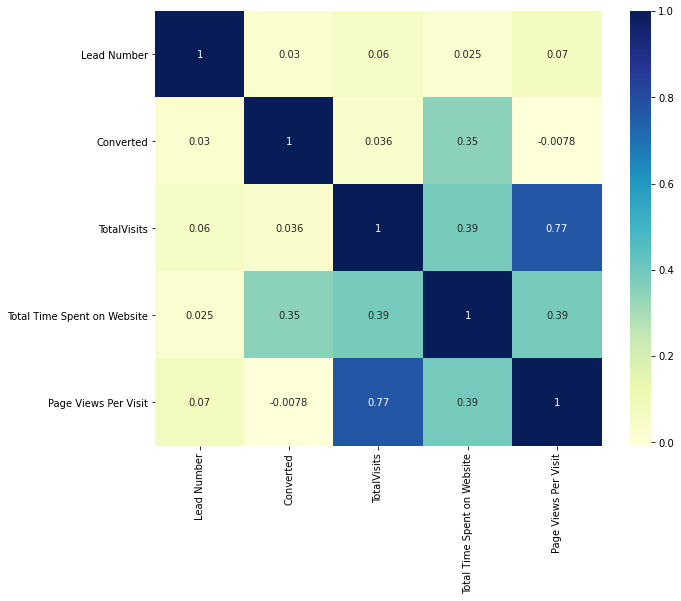

In [131]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(10,8))
sns.heatmap(lead_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

###### Insights of co-relation plot:

- Total visits has high positive co-relation with page views per visit
- converted has positive corelation with total time spent on website and negative corelation with page views per visit

### Data Preparation for Modelling

##### Converting binary variables (Yes/No) to 0/1

In [132]:
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Outside India,Unknown,Unemployed,Interested in other courses,Unknown,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Ringing,Unknown,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [134]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Country','Lead Origin']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)
lead_data.shape

(8611, 19)

In [133]:
lead_data['Last Activity'].value_counts()

Email Opened               3189
SMS Sent                   2566
Olark Chat Conversation     945
Page Visited on Website     513
Converted to Lead           425
Others                      403
Email Bounced               316
Email Link Clicked          254
Name: Last Activity, dtype: int64

##### Creating dummy variables for the remaining categorical variables and dropping the level called 'Unknown' which represents nullvalues.


In [135]:
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable Lead Source'
ml = pd.get_dummies(lead_data['Lead Source'], prefix='Lead Source')
# Dropping the level called 'Others' which represents other values
ml1 = ml.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(lead_data['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null values
ml1 = ml.drop(['Tags_Others'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(lead_data['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(lead_data['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(lead_data['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(lead_data['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Others'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Notable Activity'
ml = pd.get_dummies(lead_data['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping the level called 'Others' which represents other values
ml1 = ml.drop(['Last Notable Activity_Others'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
lead_data.shape

(8611, 76)

### Dropping the repeated variables

In [138]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop(['Tags',
                    'What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Lead Origin','Last Notable Activity'], 1)
lead_data.shape

(8611, 67)

In [139]:
# check the data again
lead_data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_Outside India,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [140]:
# Ensuring there are no categorical columns left in the dataframe
cols = lead_data.columns
num_cols = lead_data._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [141]:
# Creating a copy of this origial variable in case if needed later on
original_leads = lead_data.copy()
print(original_leads.shape)
print(lead_data.shape)

(8611, 67)
(8611, 67)


### Step 4: Test-Train Split

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
# Putting feature variable to X
X = lead_data.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_Outside India,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [144]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [145]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_Outside India,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
532,0.106035,-0.442813,0.569927,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7273,1.834432,2.375255,-0.407388,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4998,-1.190262,-0.870128,-1.262538,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6668,0.106035,-0.247575,0.569927,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2917,-1.190262,-0.870128,-1.262538,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [148]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_Outside India,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,6.027000e+03,6.027000e+03,6.027000e+03,6027.000000,6027.00000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,...,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000
mean,-1.346378e-16,9.615670e-18,-1.623991e-16,0.294674,0.31193,0.513522,0.081135,0.006305,0.274100,0.312261,...,0.298490,0.007135,0.018749,0.296997,0.384271,0.020574,0.025552,0.236436,0.003816,0.004978
std,1.000083e+00,1.000083e+00,1.000083e+00,0.455934,0.46332,0.499859,0.273065,0.079160,0.446097,0.463454,...,0.457634,0.084171,0.135648,0.456973,0.486463,0.141965,0.157807,0.424928,0.061662,0.070382
min,-1.190262e+00,-8.701282e-01,-1.262538e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.190262e+00,-8.701282e-01,-1.262538e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.060353e-01,-4.372877e-01,-4.089475e-02,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.381345e-01,7.654565e-01,5.699270e-01,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.130729e+00,3.279615e+00,2.402392e+00,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the Lead Conversion Rate

In [149]:
### Checking the Lead Conversion Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.2185576588085

We have almost 38% lead conversion rate

## Step 6: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running First Training Model

In [150]:
import statsmodels.api as sm

In [151]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     5961
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1039.9
Date:                Sun, 25 Oct 2020   Deviance:                       2079.8
Time:                        12:49:18   Pearson chi2:                 1.51e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   16.8321   1.49e+04      0.001      0.999   -2.92e+04    2.92e+04
TotalVisits                                              0.2077      0.095      2.183      0.029       0.021       0.394
Total Time Spent on Website                              1.0997      0.068     16.082      0.000       0.966       1.234
Page Views Per Visit                                    -0.3108      0.109     -2.844      0.004      -0.525      -0.097
A free copy of Mastering The Interview                  -0.1253      0.207     -0.606      0.544      -0.530       0.280
Country_Outside India                                   -0.0656      0.296     -0.222      0.824      -0.645       0.514
Lead Origin_Landing Page Submission                      0.0730      0.278      0.263      0.793      -0.472       0.618
Lead Origin_Lead Add Form                                1.9513      0.578      3.379      0.001       0.819       3.083
Lead Origin_Lead Import                                 -0.7802      0.895     -0.872      0.383      -2.534       0.974
Lead Source_Direct Traffic                              -0.5666      0.463     -1.225      0.221      -1.473       0.340
Lead Source_Google                                      -0.0719      0.431     -0.167      0.868      -0.916       0.773
Lead Source_Olark Chat                                   0.9162      0.517      1.773      0.076      -0.097       1.929
Lead Source_Organic Search                              -0.2767      0.456     -0.607      0.544      -1.170       0.617
Tags_Already a student                                  -4.1966      0.751     -5.588      0.000      -5.669      -2.725
Tags_Busy                                               -0.2476      0.262     -0.947      0.344      -0.760       0.265
Tags_Closed by Horizzon                                  5.5687      0.755      7.380      0.000       4.090       7.048
Tags_Graduation in progress                             -1.4343      0.593     -2.419      0.016      -2.596      -0.272
Tags_Interested  in full time MBA                       -3.3468      1.057     -3.167      0.002      -5.418      -1.276
Tags_Interested in other courses                        -2.8922      0.398     -7.276      0.000      -3.671      -2.113
Tags_Lost to EINS                                        6.2318      0.763      8.169      0.000       4.737       7.727
Tags_Not doing further education                        -3.3119      1.034     -3.204      0.001      -5.338      -1.286
Tags_Ringing                                            -4.7980      0.307    -15.631      0.000      -5.400      -4.196
Tags_Will revert after reading the email                 3

## Step 7: Feature Selection Using RFE

In [152]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [153]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [154]:
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False])

In [155]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('A free copy of Mastering The Interview', False, 31),
 ('Country_Outside India', False, 36),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Tags_Already a student', True, 1),
 ('Tags_Busy', False, 35),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Graduation in progress', True, 1),
 ('Tags_Interested  in full time MBA', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Not doing further education', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('What is your current occupation_Other', False, 6),
 (

In [156]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Supply Chain Management', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [157]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Country_Outside India',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Tags_Busy',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       '

##### Assessing the model with StatsModels

In [158]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1079.7
Date:                Sun, 25 Oct 2020   Deviance:                       2159.3
Time:                        12:49:55   Pearson chi2:                 1.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5223      0.127    -19.896      0.000      -2.771      -2.274
Total Time Spent on Website                              1.0778      0.065     16.546      0.000       0.950       1.205
Lead Origin_Lead Add Form                                2.5963      0.279      9.311      0.000       2.050       3.143
Lead Source_Olark Chat                                   1.4668      0.159      9.237      0.000       1.156       1.778
Tags_Already a student                                  -4.1647      0.741     -5.618      0.000      -5.618      -2.712
Tags_Closed by Horizzon                                  5.7613      0.737      7.819      0.000       4.317       7.205
Tags_Graduation in progress                             -1.5564      0.615     -2.532      0.011      -2.761      -0.352
Tags_Interested  in full time MBA                       -3.1519      1.041     -3.029      0.002      -5.192      -1.112
Tags_Interested in other courses                        -2.6361      0.380     -6.929      0.000      -3.382      -1.890
Tags_Lost to EINS                                        6.1102      0.745      8.204      0.000       4.651       7.570
Tags_Not doing further education                        -3.3683      1.027     -3.279      0.001      -5.382      -1.355
Tags_Ringing                                            -4.5939      0.291    -15.800      0.000      -5.164      -4.024
Tags_Will revert after reading the email                 3.7926      0.208     18.263      0.000       3.386       4.200
Tags_switched off                                       -4.6414      0.630     -7.362      0.000      -5.877      -3.406
What is your current occupation_Unemployed               1.6496      0.128     12.901      0.000       1.399       1.900
What is your current occupation_Working Professional     1.6327      0.364      4.487      0.000       0.920       2.346
Specialization_Supply Chain Management                  -1.1864      0.352     -3.371      0.001      -1.876      -0.497
Last Activity_Email Bounced                             -1.4995      0.481     -3.118      0.002      -2.442      -0.557
Last Activity_SMS Sent                                   2.0252      0.126     16.063      0.000       1.778       2.272
Last Notable Activity_Modified                          -1.5617      0.134    -11.671      0.000      -1.824      -1.299
Last Notable Activity_Olark Chat Conversation           -1.9373      0.473     -4.097      0.000      -2.864      -1.011
========================================================================================================================
"""

In [159]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000524
7273    0.869089
4998    0.019254
6668    0.003226
2917    0.074721
1668    0.022225
8738    0.036090
1474    0.022312
4583    0.829545
1786    0.843105
dtype: float64

In [160]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.24248637e-04, 8.69088621e-01, 1.92540847e-02, 3.22564463e-03,
       7.47213304e-02, 2.22254516e-02, 3.60898035e-02, 2.23118930e-02,
       8.29545273e-01, 8.43105319e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [161]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000524,532
1,1,0.869089,7273
2,0,0.019254,4998
3,0,0.003226,6668
4,0,0.074721,2917


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [162]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000524,532,0
1,1,0.869089,7273,1
2,0,0.019254,4998,0
3,0,0.003226,6668,0
4,0,0.074721,2917,0


In [163]:
from sklearn import metrics

#### Creating Confusion Metrics

In [164]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3578  166]
 [ 232 2051]]


In [165]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9339638294342127


#### Checking VIFs

In [166]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,4.47
11,Tags_Will revert after reading the email,2.60
10,Tags_Ringing,1.82
14,What is your current occupation_Working Profes...,1.79
18,Last Notable Activity_Modified,1.61
17,Last Activity_SMS Sent,1.57
1,Lead Origin_Lead Add Form,1.53
2,Lead Source_Olark Chat,1.49
4,Tags_Closed by Horizzon,1.46
0,Total Time Spent on Website,1.40


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [169]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_Working Professional',
       'Specialization_Supply Chain Management', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [170]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1165.3
Date:                Sun, 25 Oct 2020   Deviance:                       2330.5
Time:                        12:50:57   Pearson chi2:                 1.26e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8069      0.100    -17.984      0.000      -2.004      -1.610
Total Time Spent on Website                              1.0747      0.062     17.236      0.000       0.953       1.197
Lead Origin_Lead Add Form                                3.2887      0.275     11.978      0.000       2.751       3.827
Lead Source_Olark Chat                                   1.4139      0.150      9.424      0.000       1.120       1.708
Tags_Already a student                                  -3.3091      0.734     -4.509      0.000      -4.747      -1.871
Tags_Closed by Horizzon                                  6.5869      0.736      8.945      0.000       5.144       8.030
Tags_Graduation in progress                             -0.5861      0.615     -0.953      0.340      -1.791       0.619
Tags_Interested  in full time MBA                       -2.3950      1.054     -2.273      0.023      -4.460      -0.330
Tags_Interested in other courses                        -1.6836      0.374     -4.503      0.000      -2.416      -0.951
Tags_Lost to EINS                                        6.4186      0.733      8.752      0.000       4.981       7.856
Tags_Not doing further education                        -2.4252      1.025     -2.366      0.018      -4.434      -0.417
Tags_Ringing                                            -3.7978      0.285    -13.324      0.000      -4.356      -3.239
Tags_Will revert after reading the email                 4.5774      0.204     22.408      0.000       4.177       4.978
Tags_switched off                                       -3.7436      0.625     -5.991      0.000      -4.968      -2.519
What is your current occupation_Working Professional     0.2543      0.357      0.712      0.476      -0.445       0.954
Specialization_Supply Chain Management                  -1.0347      0.343     -3.013      0.003      -1.708      -0.362
Last Activity_Email Bounced                             -1.2211      0.487     -2.510      0.012      -2.175      -0.267
Last Activity_SMS Sent                                   2.0847      0.119     17.446      0.000       1.850       2.319
Last Notable Activity_Modified                          -1.7696      0.129    -13.716      0.000      -2.022      -1.517
Last Notable Activity_Olark Chat Conversation           -2.0240      0.461     -4.392      0.000      -2.927      -1.121
========================================================================================================================
"""

In [174]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000411
7273    0.964400
4998    0.033823
6668    0.002813
2917    0.063168
1668    0.019322
8738    0.030509
1474    0.019397
4583    0.913046
1786    0.680600
dtype: float64

In [175]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.11206486e-04, 9.64399804e-01, 3.38230756e-02, 2.81252323e-03,
       6.31684239e-02, 1.93217638e-02, 3.05087376e-02, 1.93969226e-02,
       9.13046269e-01, 6.80599607e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [176]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000411,532
1,1,0.964400,7273
2,0,0.033823,4998
3,0,0.002813,6668
4,0,0.063168,2917


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [177]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000411,532,0
1,1,0.964400,7273,1
2,0,0.033823,4998,0
3,0,0.002813,6668,0
4,0,0.063168,2917,0


In [178]:
from sklearn import metrics

In [179]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3582  162]
 [ 271 2012]]


In [180]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9281566285050605


#### Checking VIFs

In [181]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.75
17,Last Notable Activity_Modified,1.61
1,Lead Origin_Lead Add Form,1.49
2,Lead Source_Olark Chat,1.46
16,Last Activity_SMS Sent,1.45
0,Total Time Spent on Website,1.38
4,Tags_Closed by Horizzon,1.31
13,What is your current occupation_Working Profes...,1.31
7,Tags_Interested in other courses,1.12
15,Last Activity_Email Bounced,1.11


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high p-values and VIF value is less than 2. We will drop high p-value variable one at a time and run the model again. 

In [183]:
# dropping What is your current occupation_Working Professional column
col = col.drop('What is your current occupation_Working Professional', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Specialization_Supply Chain Management', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [184]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6008
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1165.5
Date:                Sun, 25 Oct 2020   Deviance:                       2331.1
Time:                        12:52:11   Pearson chi2:                 1.27e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8060      0.100    -17.975      0.000      -2.003      -1.609
Total Time Spent on Website                       1.0750      0.062     17.239      0.000       0.953       1.197
Lead Origin_Lead Add Form                         3.2937      0.275     11.996      0.000       2.756       3.832
Lead Source_Olark Chat                            1.4127      0.150      9.415      0.000       1.119       1.707
Tags_Already a student                           -3.3076      0.734     -4.507      0.000      -4.746      -1.869
Tags_Closed by Horizzon                           6.6192      0.735      9.011      0.000       5.180       8.059
Tags_Graduation in progress                      -0.5876      0.615     -0.956      0.339      -1.792       0.617
Tags_Interested  in full time MBA                -2.3943      1.054     -2.271      0.023      -4.461      -0.328
Tags_Interested in other courses                 -1.6719      0.374     -4.471      0.000      -2.405      -0.939
Tags_Lost to EINS                                 6.4235      0.733      8.761      0.000       4.987       7.860
Tags_Not doing further education                 -2.4263      1.025     -2.367      0.018      -4.435      -0.418
Tags_Ringing                                     -3.7951      0.285    -13.324      0.000      -4.353      -3.237
Tags_Will revert after reading the email          4.6319      0.192     24.175      0.000       4.256       5.007
Tags_switched off                                -3.7429      0.625     -5.989      0.000      -4.968      -2.518
Specialization_Supply Chain Management           -1.0379      0.344     -3.021      0.003      -1.711      -0.364
Last Activity_Email Bounced                      -1.2291      0.488     -2.516      0.012      -2.186      -0.272
Last Activity_SMS Sent                            2.0841      0.119     17.444      0.000       1.850       2.318
Last Notable Activity_Modified                   -1.7672      0.129    -13.711      0.000      -2.020      -1.515
Last Notable Activity_Olark Chat Conversation    -2.0267      0.461     -4.399      0.000      -2.930      -1.124
=================================================================================================================
"""

In [185]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000413
7273    0.966193
4998    0.033721
6668    0.002823
2917    0.063941
1668    0.019400
8738    0.030568
1474    0.019476
4583    0.913119
1786    0.680353
dtype: float64

In [186]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.12787082e-04, 9.66192501e-01, 3.37211151e-02, 2.82262827e-03,
       6.39408504e-02, 1.94003097e-02, 3.05681019e-02, 1.94757891e-02,
       9.13119140e-01, 6.80352629e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [187]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000413,532
1,1,0.966193,7273
2,0,0.033721,4998
3,0,0.002823,6668
4,0,0.063941,2917


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [188]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000413,532,0
1,1,0.966193,7273,1
2,0,0.033721,4998,0
3,0,0.002823,6668,0
4,0,0.063941,2917,0


In [189]:
from sklearn import metrics

In [190]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3582  162]
 [ 271 2012]]


In [864]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [191]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9281566285050605


#### Checking VIFs

In [192]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_Modified,1.61
11,Tags_Will revert after reading the email,1.52
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Olark Chat,1.46
15,Last Activity_SMS Sent,1.45
0,Total Time Spent on Website,1.38
4,Tags_Closed by Horizzon,1.30
7,Tags_Interested in other courses,1.12
14,Last Activity_Email Bounced,1.11
10,Tags_Ringing,1.09


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high p-values and VIF value is less than 2. We will drop high p-value variable one at a time and run the model again.

In [194]:
#dropping the Tags_Graduation in progress column
col = col.drop('Tags_Graduation in progress', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Specialization_Supply Chain Management', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [195]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6009
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1166.0
Date:                Sun, 25 Oct 2020   Deviance:                       2332.1
Time:                        12:53:39   Pearson chi2:                 1.28e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8168      0.100    -18.173      0.000      -2.013      -1.621
Total Time Spent on Website                       1.0769      0.062     17.280      0.000       0.955       1.199
Lead Origin_Lead Add Form                         3.3034      0.275     12.032      0.000       2.765       3.842
Lead Source_Olark Chat                            1.4209      0.150      9.483      0.000       1.127       1.715
Tags_Already a student                           -3.3007      0.734     -4.496      0.000      -4.740      -1.862
Tags_Closed by Horizzon                           6.6330      0.735      9.030      0.000       5.193       8.073
Tags_Interested  in full time MBA                -2.3856      1.054     -2.262      0.024      -4.452      -0.319
Tags_Interested in other courses                 -1.6637      0.374     -4.447      0.000      -2.397      -0.930
Tags_Lost to EINS                                 6.4374      0.733      8.781      0.000       5.001       7.874
Tags_Not doing further education                 -2.4168      1.025     -2.358      0.018      -4.426      -0.408
Tags_Ringing                                     -3.7928      0.285    -13.310      0.000      -4.351      -3.234
Tags_Will revert after reading the email          4.6439      0.191     24.259      0.000       4.269       5.019
Tags_switched off                                -3.7398      0.625     -5.982      0.000      -4.965      -2.514
Specialization_Supply Chain Management           -1.0351      0.344     -3.009      0.003      -1.709      -0.361
Last Activity_Email Bounced                      -1.2223      0.489     -2.501      0.012      -2.180      -0.264
Last Activity_SMS Sent                            2.0901      0.119     17.506      0.000       1.856       2.324
Last Notable Activity_Modified                   -1.7739      0.129    -13.780      0.000      -2.026      -1.522
Last Notable Activity_Olark Chat Conversation    -2.0345      0.460     -4.419      0.000      -2.937      -1.132
=================================================================================================================
"""

In [196]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000407
7273    0.966120
4998    0.033330
6668    0.002798
2917    0.064140
1668    0.019296
8738    0.052880
1474    0.019371
4583    0.913033
1786    0.680754
dtype: float64

In [197]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.06570199e-04, 9.66120245e-01, 3.33301358e-02, 2.79763127e-03,
       6.41399718e-02, 1.92958249e-02, 5.28798758e-02, 1.93710378e-02,
       9.13033402e-01, 6.80754274e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [198]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000407,532
1,1,0.966120,7273
2,0,0.033330,4998
3,0,0.002798,6668
4,0,0.064140,2917


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [199]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000407,532,0
1,1,0.966120,7273,1
2,0,0.033330,4998,0
3,0,0.002798,6668,0
4,0,0.064140,2917,0


In [874]:
from sklearn import metrics

In [200]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3582  162]
 [ 271 2012]]


In [876]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [201]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9281566285050605


#### Checking VIFs

In [878]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [202]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,1.58
10,Tags_Will revert after reading the email,1.52
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Olark Chat,1.46
14,Last Activity_SMS Sent,1.45
0,Total Time Spent on Website,1.38
4,Tags_Closed by Horizzon,1.30
6,Tags_Interested in other courses,1.12
13,Last Activity_Email Bounced,1.11
9,Tags_Ringing,1.09


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high p-values and VIF value is less than 2. We will drop high p-value variable one at a time and run the model again.

In [203]:
# dropping Tags_Interested in full time MBA
col = col.drop('Tags_Interested  in full time MBA', 1)
col


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Specialization_Supply Chain Management', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [204]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1171.0
Date:                Sun, 25 Oct 2020   Deviance:                       2342.1
Time:                        12:54:47   Pearson chi2:                 1.28e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8489      0.100    -18.563      0.000      -2.044      -1.654
Total Time Spent on Website                       1.0723      0.062     17.288      0.000       0.951       1.194
Lead Origin_Lead Add Form                         3.2846      0.273     12.029      0.000       2.749       3.820
Lead Source_Olark Chat                            1.4348      0.150      9.583      0.000       1.141       1.728
Tags_Already a student                           -3.2689      0.734     -4.454      0.000      -4.707      -1.830
Tags_Closed by Horizzon                           6.6739      0.734      9.087      0.000       5.234       8.113
Tags_Interested in other courses                 -1.6357      0.375     -4.368      0.000      -2.370      -0.902
Tags_Lost to EINS                                 6.4733      0.733      8.830      0.000       5.036       7.910
Tags_Not doing further education                 -2.3850      1.025     -2.327      0.020      -4.394      -0.376
Tags_Ringing                                     -3.7784      0.285    -13.267      0.000      -4.337      -3.220
Tags_Will revert after reading the email          4.6762      0.191     24.426      0.000       4.301       5.051
Tags_switched off                                -3.7298      0.625     -5.965      0.000      -4.955      -2.504
Specialization_Supply Chain Management           -1.0320      0.344     -2.999      0.003      -1.706      -0.357
Last Activity_Email Bounced                      -1.2016      0.488     -2.464      0.014      -2.157      -0.246
Last Activity_SMS Sent                            2.1169      0.119     17.763      0.000       1.883       2.351
Last Notable Activity_Modified                   -1.7846      0.128    -13.891      0.000      -2.036      -1.533
Last Notable Activity_Olark Chat Conversation    -2.0275      0.460     -4.410      0.000      -2.929      -1.126
=================================================================================================================
"""

In [205]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000394
7273    0.965995
4998    0.033097
6668    0.002752
2917    0.065954
1668    0.018829
8738    0.050628
1474    0.018902
4583    0.911892
1786    0.683476
dtype: float64

In [206]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.94223464e-04, 9.65995156e-01, 3.30974408e-02, 2.75175346e-03,
       6.59543765e-02, 1.88289542e-02, 5.06278690e-02, 1.89020655e-02,
       9.11891749e-01, 6.83475545e-01])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [207]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000394,532
1,1,0.965995,7273
2,0,0.033097,4998
3,0,0.002752,6668
4,0,0.065954,2917


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [208]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000394,532,0
1,1,0.965995,7273,1
2,0,0.033097,4998,0
3,0,0.002752,6668,0
4,0,0.065954,2917,0


In [890]:
from sklearn import metrics

In [209]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3582  162]
 [ 273 2010]]


In [210]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9278247884519661


#### Checking VIFs

In [211]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,1.55
9,Tags_Will revert after reading the email,1.52
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Olark Chat,1.46
13,Last Activity_SMS Sent,1.45
0,Total Time Spent on Website,1.38
4,Tags_Closed by Horizzon,1.30
5,Tags_Interested in other courses,1.12
12,Last Activity_Email Bounced,1.11
8,Tags_Ringing,1.09


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high p-values and VIF value is less than 2. We will drop high p-value variable one at a time and run the model again.

In [214]:
#dropping the Tags_Not doing further education column
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Specialization_Supply Chain Management', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [215]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1176.9
Date:                Sun, 25 Oct 2020   Deviance:                       2353.8
Time:                        12:57:02   Pearson chi2:                 1.35e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8863      0.099    -18.991      0.000      -2.081      -1.692
Total Time Spent on Website                       1.0695      0.062     17.336      0.000       0.949       1.190
Lead Origin_Lead Add Form                         3.3144      0.273     12.124      0.000       2.779       3.850
Lead Source_Olark Chat                            1.4583      0.150      9.737      0.000       1.165       1.752
Tags_Already a student                           -3.2346      0.734     -4.406      0.000      -4.673      -1.796
Tags_Closed by Horizzon                           6.7259      0.735      9.156      0.000       5.286       8.166
Tags_Interested in other courses                 -1.6032      0.375     -4.275      0.000      -2.338      -0.868
Tags_Lost to EINS                                 6.5230      0.733      8.896      0.000       5.086       7.960
Tags_Ringing                                     -3.7666      0.285    -13.214      0.000      -4.325      -3.208
Tags_Will revert after reading the email          4.7210      0.192     24.629      0.000       4.345       5.097
Tags_switched off                                -3.7141      0.626     -5.937      0.000      -4.940      -2.488
Specialization_Supply Chain Management           -1.0595      0.341     -3.107      0.002      -1.728      -0.391
Last Activity_Email Bounced                      -1.3090      0.476     -2.752      0.006      -2.241      -0.377
Last Activity_SMS Sent                            2.1412      0.119     18.000      0.000       1.908       2.374
Last Notable Activity_Modified                   -1.8008      0.128    -14.066      0.000      -2.052      -1.550
Last Notable Activity_Olark Chat Conversation    -2.0135      0.460     -4.373      0.000      -2.916      -1.111
=================================================================================================================
"""

In [216]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000380
7273    0.966480
4998    0.033179
6668    0.002684
2917    0.067773
1668    0.018283
8738    0.048031
1474    0.018354
4583    0.910391
1786    0.686230
dtype: float64

In [217]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.80076015e-04, 9.66479556e-01, 3.31792674e-02, 2.68412677e-03,
       6.77732062e-02, 1.82828227e-02, 4.80308941e-02, 1.83536682e-02,
       9.10390747e-01, 6.86230084e-01])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [218]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.000380,532
1,1,0.966480,7273
2,0,0.033179,4998
3,0,0.002684,6668
4,0,0.067773,2917


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [219]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.000380,532,0
1,1,0.966480,7273,1
2,0,0.033179,4998,0
3,0,0.002684,6668,0
4,0,0.067773,2917,0


In [220]:
from sklearn import metrics

In [221]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3593  151]
 [ 274 2009]]


In [222]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9294839887174382


#### Checking VIFs

In [223]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [224]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.53
8,Tags_Will revert after reading the email,1.52
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Olark Chat,1.45
12,Last Activity_SMS Sent,1.45
0,Total Time Spent on Website,1.38
4,Tags_Closed by Horizzon,1.29
5,Tags_Interested in other courses,1.11
7,Tags_Ringing,1.09
11,Last Activity_Email Bounced,1.08


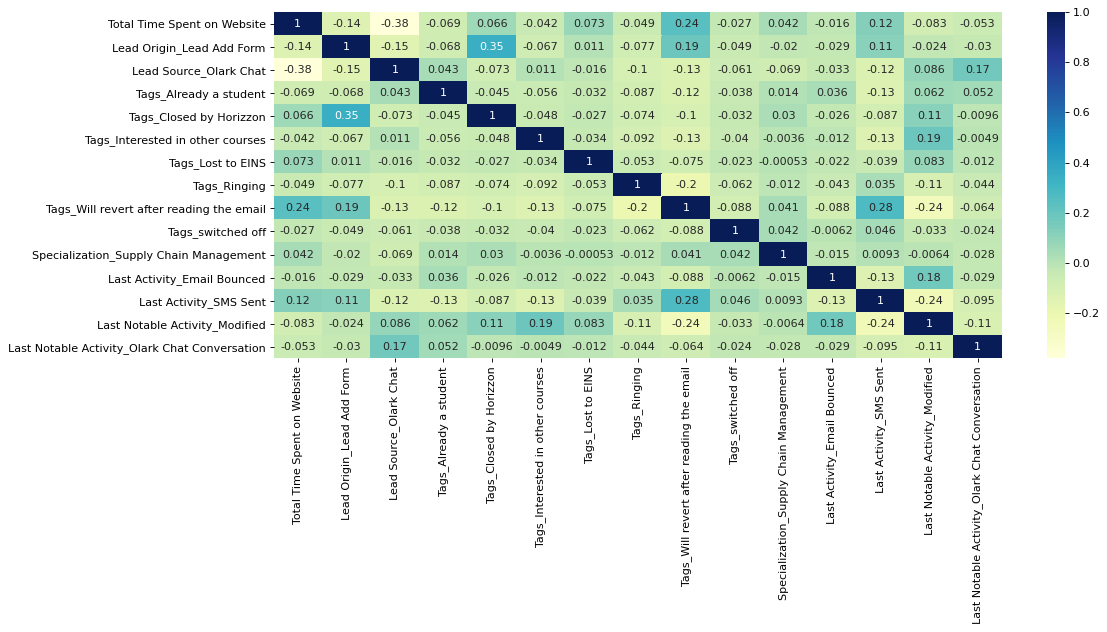

In [225]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

Above heatmap clearly indicates, there is no higher correlation between variables. 

### Our latest model have the following features:
 - <font color = blue>All variables have p-value < 0.05. </font>
 - <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
 - <font color = blue>The overall accuracy of `0.9295` at a probability threshold of 0.05 is also very acceptable.</font>
 
### So we need not drop any more variables and we can proceed with making predictions using this model only

## Step 8: Calculating Metrics beyond Accuracy

In [226]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [227]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8799824791940429

In [228]:
# Let us calculate specificity
TN / float(TN+FP)

0.9596688034188035

In [229]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.040331196581196584


In [230]:
# positive predictive value 
print (TP / float(TP+FP))

0.9300925925925926


In [232]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9291440393069563


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [233]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [234]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

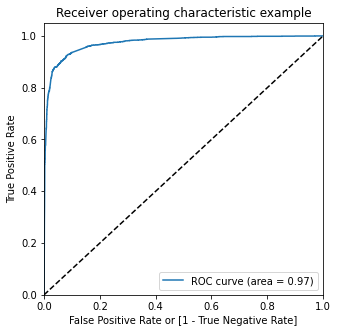

(array([0.        , 0.        , 0.        , ..., 0.99946581, 0.99973291,
        1.        ]),
 array([0.00000000e+00, 4.38020149e-04, 8.76040298e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99998258e+00, 9.99982578e-01, 9.99979451e-01, ...,
        7.25985902e-05, 6.73630930e-05, 6.48011157e-05]))

In [235]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Calculating the area under the curve(GINI)

In [236]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [237]:
auc = auc_val(fpr,tpr)
auc

0.97375891951284

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [238]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000380,532,0,1,0,0,0,0,0,0,0,0,0
1,1,0.966480,7273,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033179,4998,0,1,0,0,0,0,0,0,0,0,0
3,0,0.002684,6668,0,1,0,0,0,0,0,0,0,0,0
4,0,0.067773,2917,0,1,0,0,0,0,0,0,0,0,0


In [239]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378795  1.000000  0.000000
0.1   0.1  0.849676  0.970653  0.775908
0.2   0.2  0.889995  0.956198  0.849626
0.3   0.3  0.920856  0.920718  0.920940
0.4   0.4  0.925004  0.901883  0.939103
0.5   0.5  0.929484  0.879982  0.959669
0.6   0.6  0.929650  0.862024  0.970887
0.7   0.7  0.911731  0.800263  0.979701
0.8   0.8  0.904596  0.773544  0.984509
0.9   0.9  0.882529  0.706527  0.989850


### Let's plot accuracy sensitivity and specificity for various probabilities.


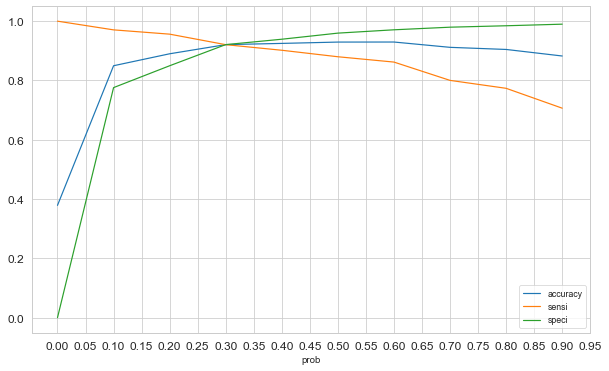

In [240]:
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [241]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000380,532,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.966480,7273,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033179,4998,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002684,6668,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.067773,2917,0,1,0,0,0,0,0,0,0,0,0,0


In [242]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9208561473369836

In [243]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3448,  296],
       [ 181, 2102]])

In [244]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [245]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.92071835304424

In [246]:
# Let us calculate specificity
TN / float(TN+FP)

0.9209401709401709

In [247]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07905982905982906


In [248]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8765638031693077


In [249]:
# Negative predictive value
print (TN / float(TN+ FN))

0.950124001102232


## Step 11: Precision and Recall

##### Precision
TP / TP + FP

In [250]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8765638031693077

##### Recall
TP / TP + FN

In [251]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.92071835304424

### Precision and recall tradeoff

In [256]:
from sklearn.metrics import precision_recall_curve

In [257]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6022    0
 6023    0
 6024    0
 6025    0
 6026    1
 Name: Converted, Length: 6027, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6022    0
 6023    0
 6024    1
 6025    0
 6026    1
 Name: final_predicted, Length: 6027, dtype: int64)

In [258]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

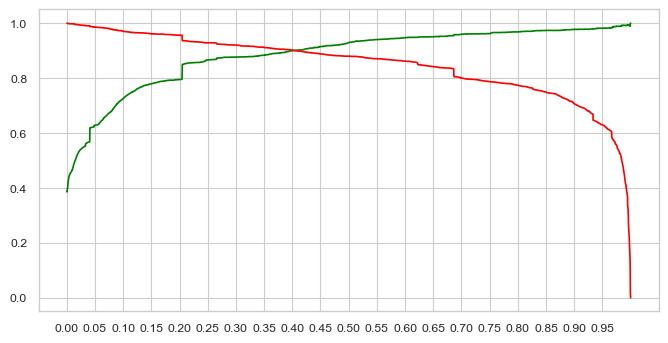

In [259]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .4. However our business requirement here is to have Lead Conversion Rate around 80%.  

#### This is already achieved with our earlier threshold value of 0.3. So we will stick to this value.

### Calculating the F1 score
##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [260]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8980986968596453

## Step 12: Making predictions on the test set

#### Using the scaler function from the train dataset to transform the test dataset

In [261]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_Outside India,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
376,0.538134,-0.184951,1.180749,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8914,-0.326064,-0.866444,-0.040895,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7331,0.106035,-0.210737,0.569927,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6344,-0.326064,1.124622,-0.040895,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3783,2.698630,-0.126011,0.569927,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [262]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Specialization_Supply Chain Management,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
376,-0.184951,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8914,-0.866444,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7331,-0.210737,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6344,1.124622,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3783,-0.126011,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Adding the constant

In [263]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [264]:
y_test_pred = res.predict(X_test_sm)

In [265]:
y_test_pred[:10]

376     0.020136
8914    0.002358
7331    0.002792
6344    0.335465
3783    0.117007
4783    0.000981
3789    0.970277
185     0.069499
4116    0.976438
8622    0.981297
dtype: float64

In [266]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [267]:
# Let's see the head
y_pred_1.head()

,0
376,0.020136
8914,0.002358
7331,0.002792
6344,0.335465
3783,0.117007


In [268]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [269]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [270]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [271]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [272]:
y_pred_final.head()

,Converted,LeadID,0
0,0,376,0.020136
1,0,8914,0.002358
2,0,7331,0.002792
3,1,6344,0.335465
4,0,3783,0.117007


In [273]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [274]:
y_pred_final

,Converted,LeadID,Conversion_Prob
0,0,376,0.020136
1,0,8914,0.002358
2,0,7331,0.002792
3,1,6344,0.335465
4,0,3783,0.117007
...,...,...,...
2579,0,3782,0.000664
2580,0,6056,0.000682
2581,0,167,0.002754
2582,0,1938,0.031878


In [275]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadID','Converted','Conversion_Prob']]

In [276]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,376,0,0.020136
1,8914,0,0.002358
2,7331,0,0.002792
3,6344,1,0.335465
4,3783,0,0.117007


In [277]:
y_pred_final.shape

(2584, 3)

#### Using the probability threshold value 0f 0.3 on the test dataset to predict if a lead will convert

In [327]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [328]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,376,0,0.02,0
1,8914,0,0.00,0
2,7331,0,0.00,0
3,6344,1,0.34,1
4,3783,0,0.12,0


In [280]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9051857585139319

In [281]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1433  143]
 [ 102  906]]


In [282]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

##### Sensitivity
TP / TP + FN

In [283]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8988095238095238

##### Specificity
TN / TN + FP

In [284]:
# Let us calculate specificity
TN / float(TN+FP)

0.9092639593908629

##### False Postive Rate
FP / TN + FP

In [285]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09073604060913705


##### Positive Predictive Value
TP / TP + FP

In [286]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8636796949475691


##### Negative Predictive Value
TN / TN + FN

In [287]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9335504885993485


##### Precision
TP / TP + FP

In [288]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8636796949475691

##### Recall
TP / TP + FN

In [289]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8988095238095238

##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [290]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8808945065629559

### Plotting the ROC Curve for Test Dataset

In [293]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [294]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

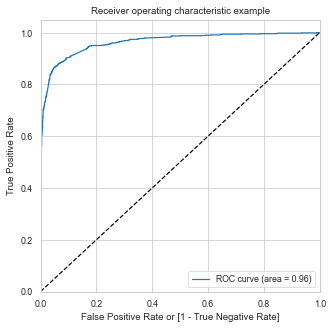

(array([0.        , 0.        , 0.        , ..., 0.99873096, 0.99936548,
        1.        ]),
 array([0.00000000e+00, 9.92063492e-04, 1.98412698e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99997768e+00, 9.99977679e-01, 9.99959395e-01, ...,
        1.16565916e-04, 7.67624848e-05, 3.08468908e-05]))

In [295]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve(GINI)

In [296]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [297]:
auc = auc_val(fpr,tpr)
auc

0.9639961526065479

***As a rule of thumb, an AUC can be classed as follows,***

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail
 
***Since we got a value of 0.9639, our model seems to be doing well on the test dataset.***

## Step 13: Calculating Lead score for the entire dataset

### Lead Score = 100 * ConversionProbability

#### This needs to be calculated for all the leads from the original dataset (train + test)

In [329]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,376,0,0.02,0
1,8914,0,0.00,0
2,7331,0,0.00,0
3,6344,1,0.34,1
4,3783,0,0.12,0


In [330]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.00,532,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.97,7273,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.03,4998,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.00,6668,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.07,2917,0,1,0,0,0,0,0,0,0,0,0,0


In [331]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,532,0,0.00,0
1,7273,1,0.97,1
2,4998,0,0.03,0
3,6668,0,0.00,0
4,2917,0,0.07,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [332]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,532,0,0.00,0
1,7273,1,0.97,1
2,4998,0,0.03,0
3,6668,0,0.00,0
4,2917,0,0.07,0


In [333]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6027, 4)
(2584, 4)
(8611, 4)


In [334]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8611

In [335]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,532,0,0.00,0,0
1,7273,1,0.97,1,97
2,4998,0,0.03,0,3
3,6668,0,0.00,0,0
4,2917,0,0.07,0,7


In [305]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [336]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.01,0,1
1,0,0.01,0,1
2,1,0.99,1,99
3,0,0.00,0,0
4,1,0.95,1,95


In [337]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


#### Concatenating the 2 dataframes based on index.
#### This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.


In [338]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.01,0,1
1,660728,0,0.01,0,1
2,660727,1,0.99,1,99
3,660719,0,0.00,0,0
4,660681,1,0.95,1,95
5,660680,0,0.04,0,4
6,660673,1,0.91,1,91
7,660664,0,0.04,0,4
8,660624,0,0.06,0,6
9,660616,0,0.06,0,6


In [309]:
# Inspecting the dataframe shape
leads_with_score.shape

(8611, 5)

In [339]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.00
final_predicted,0,0.00
Conversion_Prob,0,0.00
Converted,0,0.00
Lead Number,0,0.00


## Step 14: Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [340]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params = new_params.reset_index()

In [341]:
new_params.rename(columns = {'Index':'Features', 0:'Importance'}, inplace=True)

In [342]:
new_params.sort_values(by='Importance', ascending = False, inplace=True)

In [343]:
new_params

,index,Importance
4,Tags_Closed by Horizzon,6.73
6,Tags_Lost to EINS,6.52
8,Tags_Will revert after reading the email,4.72
1,Lead Origin_Lead Add Form,3.31
12,Last Activity_SMS Sent,2.14
2,Lead Source_Olark Chat,1.46
0,Total Time Spent on Website,1.07
10,Specialization_Supply Chain Management,-1.06
11,Last Activity_Email Bounced,-1.31
5,Tags_Interested in other courses,-1.60


### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [321]:
new_params.head(3)

,index,Importance
4,Tags_Closed by Horizzon,6.73
6,Tags_Lost to EINS,6.52
8,Tags_Will revert after reading the email,4.72


## Step 15: Conclusion


### After trying several models, we finally chose a model with the following characteristics:

 - <font color = blue>All variables have p-value < `0.05`. </font>
 - <font color = blue>All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.</font>
 - <font color = blue>The overall accuracy of `0.9098` at a probability threshold of 0.30 on the test dataset is also very acceptable.</font>
    
#### Using this model, the dependent variable value was predicted as per the following threshold values of Conversion probability:

|Dataset|Threshhold value|Accuracy|Sensitivity|Specificity|False Postive Rate|Positive Predictive Value|Negative Predictive value|Precision|Recall|F1 value|AUC||
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|train|0.50|<font color = red>0.9295</font>|0.8799|<font color = red>0.9596</font>|0.0400|<font color = red>0.9301</font>|0.9291||||0.9737||
|train|0.30|0.9208|<font color = red>0.9207</font>|0.9209|<font color = red>0.0791</font>|0.8765|<font color = red>0.9501</font>|0.8765|0.9207|0.8980|||
|<font color = blue>test</font>|<font color = blue>0.30</font>|<font color = blue>0.9052</font>|<font color = blue>0.8988</font>|<font color = blue>0.9092</font>|<font color = blue>0.0907</font>|<font color = blue>0.8637</font>|<font color = blue>0.9335</font>|<font color = blue>0.8636</font>|<font color = blue>0.8988</font>|<font color = blue>0.8809</font>|<font color = blue>0.9639</font>|<font color = blue></font>|

### Based on our model, some features are identified which contribute most to a Lead getting converted successfully. 


#### The conversion probability of a lead increases with increase in values of the following features in descending order:
    

|Features with Positive Coefficient Values|
|-------------|
|Tags_Closed by Horizzon|
|Tags_Lost to EINS|
|Tags_Will revert after reading the email|
|Lead Origin_Lead Add Form|
|Last Activity_SMS Sent|
|Lead Source_Olark Chat|
|Total Time Spent on Website|

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_Ringing|
|Tags_switched off|
|Tags_Already a student|
|Last Notable Activity_Olark Chat Conversation|
|Last Notable Activity_Modified|
|Tags_Interested in other courses|
|Last Activity_Email Bounced|
|Specialization_Supply Chain Management|

